In [1]:
using CSV,DataFrames,JSON,Plots, PyCall

PyCall.pygui_start(:qt_pyqt5)
sns = pyimport("seaborn")
pd = pyimport("pandas")
plt = pyimport("matplotlib.pyplot")
optimize = pyimport("scipy.optimize")


objc[42827]: Class QT_ROOT_LEVEL_POOL__THESE_OBJECTS_WILL_BE_RELEASED_WHEN_QAPP_GOES_OUT_OF_SCOPE is implemented in both /Users/echo/.julia/artifacts/8b78efc7d3dd45507e222d363b349faa79305991/lib/QtCore.framework/Versions/A/QtCore (0x16fd7d478) and /Users/echo/.julia/conda/3/aarch64/lib/libQt5Core.5.15.8.dylib (0x17b6c52f0). One of the two will be used. Which one is undefined.
objc[42827]: Class KeyValueObserver is implemented in both /Users/echo/.julia/artifacts/8b78efc7d3dd45507e222d363b349faa79305991/lib/QtCore.framework/Versions/A/QtCore (0x16fd7d4a0) and /Users/echo/.julia/conda/3/aarch64/lib/libQt5Core.5.15.8.dylib (0x17b6c5318). One of the two will be used. Which one is undefined.
objc[42827]: Class RunLoopModeTracker is implemented in both /Users/echo/.julia/artifacts/8b78efc7d3dd45507e222d363b349faa79305991/lib/QtCore.framework/Versions/A/QtCore (0x16fd7d4f0) and /Users/echo/.julia/conda/3/aarch64/lib/libQt5Core.5.15.8.dylib (0x17b6c5368). One of the two will be used. Which one

PyObject <module 'scipy.optimize' from '/Users/echo/.julia/conda/3/aarch64/lib/python3.10/site-packages/scipy/optimize/__init__.py'>

## Plot the 2D heatmap

In [2]:
function wave_front_r(plane_sol_at_t, dr, S_cri)
    N_r = Int(length(plane_sol_at_t)/2)
    ix = findlast(plane_sol_at_t[1:N_r] .> S_cri)
    if ix == nothing
        return 0
    else
        return ix*dr
    end
end

# Convert the 1D polar data to a 2D Cartesian grid 
function polar_to_cartesian(density, r_values, x_values, y_values)
    n = length(r_values)
    cartesian_data = zeros(Float64, n, n)

    for i in 1:n
        for j in 1:n
            r = sqrt(x_values[j]^2 + y_values[i]^2)
            # Find the closest index in r_values to this r
            _, idx = findmin(abs.(r_values .- r))
            cartesian_data[i, j] = density[idx]
        end
    end
    return cartesian_data
end

polar_to_cartesian (generic function with 1 method)

In [3]:
relay_sim = CSV.read("DPI_relay_fit.csv",DataFrame)
relay_params = JSON.parsefile("DPI_relay_fit.json")

Lth = relay_params["Lth"]
Rth = relay_params["Rth"]
dr = relay_params["dr"]
r_source = relay_params["r_source"]
savedt = relay_params["dt"]

ti = 400
N_r = Int(length(relay_sim[:,1])/2)
r_values = 0.0:dr:dr*(N_r-1) 

# Create a grid for x and y values
n = length(r_values)
x_values = LinRange(-maximum(r_values), maximum(r_values), n)
y_values = LinRange(-maximum(r_values), maximum(r_values), n)
x_grid, y_grid = [x for x in x_values, y in y_values], [y for x in x_values, y in y_values]


([-499.99999999999994 -499.99999999999994 … -499.99999999999994 -499.99999999999994; -497.9959919839678 -497.9959919839678 … -497.9959919839678 -497.9959919839678; … ; 497.9959919839678 497.9959919839678 … 497.9959919839678 497.9959919839678; 499.99999999999994 499.99999999999994 … 499.99999999999994 499.99999999999994], [-499.99999999999994 -497.9959919839678 … 497.9959919839678 499.99999999999994; -499.99999999999994 -497.9959919839678 … 497.9959919839678 499.99999999999994; … ; -499.99999999999994 -497.9959919839678 … 497.9959919839678 499.99999999999994; -499.99999999999994 -497.9959919839678 … 497.9959919839678 499.99999999999994])

In [5]:

for ti in 205:1:215
    cartesian_data = polar_to_cartesian(relay_sim[:,ti], r_values, x_values, y_values)

    # Plotting the heatmap
    fig, ax = plt.subplots(figsize=(3,3))
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    sns.heatmap(data=cartesian_data,cmap="Purples", cbar=false, vmin=0, vmax=Lth*2.0, square=true, xticklabels=false, yticklabels=false)
    circle1 = plt.Circle([250,250], wave_front_r(relay_sim[:,ti], dr, Lth)*0.5, color="#3B76B0", fill=false, linestyle="--", linewidth=5)
    ax.add_patch(circle1)
    plt.xlim(50,450)
    plt.ylim(50,450)
    plt.xlabel("")
    plt.ylabel("")
    file_t = ti-5
    plt.savefig("heatmaps/animations/simple_relay/fig4-simpleheat_$file_t.png", dpi=300, pad_inches = 0)
    plt.close()
end

## Stopping wave simulation heatmap

In [7]:

stop_wave_sim = CSV.read("Son-0.00095_a-0.0104_L1a-0.0712_L1L2-100.0_R1b-71.0.csv",DataFrame)
stop_wave_params = JSON.parsefile("Son-0.00095_a-0.0104_L1a-0.0712_L1L2-100.0_R1b-71.0_params.json")

Lth = stop_wave_params["Lth"]
Rth = stop_wave_params["Rth"]
dr = stop_wave_params["dr"]
r_source = stop_wave_params["r_source"]
savedt = stop_wave_params["dt"]

ti = 400
N_r = Int(length(stop_wave_sim[:,1])/2)
r_values = 0.0:dr:dr*(N_r-1) 

# Create a grid for x and y values
n = length(r_values)
x_values = LinRange(-maximum(r_values), maximum(r_values), n)
y_values = LinRange(-maximum(r_values), maximum(r_values), n)
x_grid, y_grid = [x for x in x_values, y in y_values], [y for x in x_values, y in y_values]


([-499.99999999999994 -499.99999999999994 … -499.99999999999994 -499.99999999999994; -497.9959919839678 -497.9959919839678 … -497.9959919839678 -497.9959919839678; … ; 497.9959919839678 497.9959919839678 … 497.9959919839678 497.9959919839678; 499.99999999999994 499.99999999999994 … 499.99999999999994 499.99999999999994], [-499.99999999999994 -497.9959919839678 … 497.9959919839678 499.99999999999994; -499.99999999999994 -497.9959919839678 … 497.9959919839678 499.99999999999994; … ; -499.99999999999994 -497.9959919839678 … 497.9959919839678 499.99999999999994; -499.99999999999994 -497.9959919839678 … 497.9959919839678 499.99999999999994])

In [9]:

# Plotting the heatmap

for ti in 1:1:160
    cartesian_data = polar_to_cartesian(stop_wave_sim[:,ti], r_values, x_values, y_values)

    # Plotting the heatmap
    fig, ax = plt.subplots(figsize=(3,3))
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    sns.heatmap(data=cartesian_data,cmap="Purples", cbar=false, vmin=0, vmax=Lth*2.0, square=true, xticklabels=false, yticklabels=false)
    circle1 = plt.Circle([250,250], wave_front_r(stop_wave_sim[:,ti], dr, Lth)*0.5, color="#3B76B0", fill=false, linestyle="--", linewidth=5)
    ax.add_patch(circle1)
    plt.xlim(50,450)
    plt.ylim(50,450)
    plt.xlabel("")
    plt.ylabel("")
    file_t = ti-5
    plt.savefig("heatmaps/animations/ser/fig4-ser_$file_t.png", dpi=300)
    plt.close()
end
#iterate over all ti to get a movie

In [380]:
r_stop_Lth = []
r_stop_Rth = []

for ti in 1:300
    append!(r_stop_Lth, wave_front_r(stop_wave_sim[:,ti], dr, Lth))
    append!(r_stop_Rth, wave_front_r(stop_wave_sim[:,ti], dr, Lth/100.0))
end
r_stop_Lth = r_stop_Lth .- r_stop_Lth[2];
r_stop_Rth = r_stop_Rth .- r_stop_Rth[2];

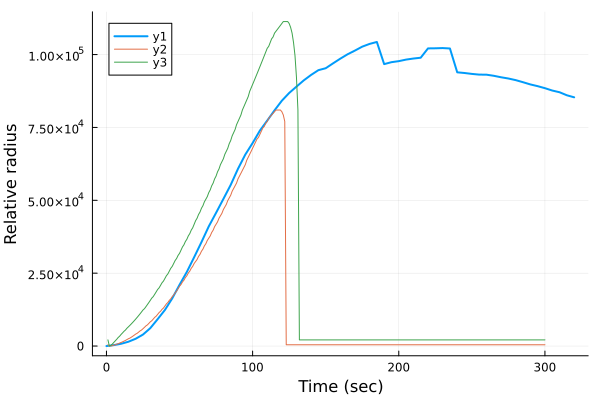

In [381]:
plot(exp_data[:,:real_time],exp_data[:,:relative_radius].^2, xlab = "Time (sec)", ylab = "Relative radius",lw = 2)
plot!(1:300, r_stop_Lth.^2)
plot!(1:300, r_stop_Rth.^2)

In [382]:
CSV.write("fits/whole_stop_fit_Lth.csv", DataFrame(time=1:300, r_relay = r_stop_Lth))
CSV.write("fits/whole_stop_fit_Rth.csv", DataFrame(time=1:300, r_relay = r_stop_Rth))


"fits/whole_stop_fit_Rth.csv"

# Compare with DPI data

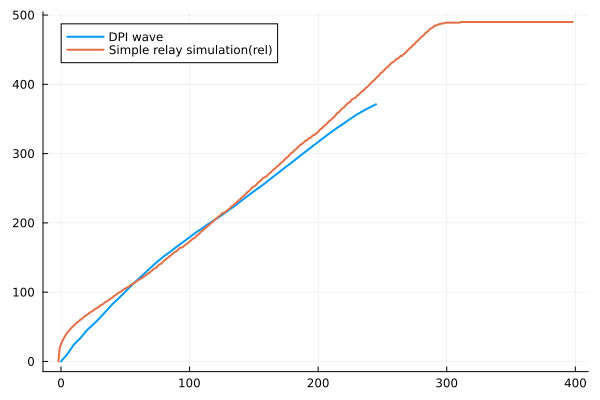

In [199]:
DPI_wave_mean = CSV.read("fig3-time-v-radius-dpi.csv",DataFrame)
plot(DPI_wave_mean[:,:real_time],DPI_wave_mean[:,:rel_r], label="DPI wave",lw = 2)

DPI_relay_sim = CSV.read("DPI_relay_fit.csv",DataFrame)
DPI_relay_params = JSON.parsefile("DPI_relay_fit.json")

Lth = DPI_relay_params["Lth"]
Rth = DPI_relay_params["Rth"]
dr = DPI_relay_params["dr"]
r_source = DPI_relay_params["r_source"]
savedt = DPI_relay_params["dt"]
r_Lth_DPI = [wave_front_r(DPI_relay_sim[:,ti], dr , Lth*1.0) for ti in 1:N_t]
N_t = size(relay_sim, 2)
ts = 0:savedt:savedt*(N_t-1)
plot!(ts[1:end]*t_scale .- 2, r_Lth_DPI[1:end]*x_scale ,lw = 2, label = "Simple relay simulation(rel)")

In [200]:

CSV.write("fits/DPI_relay_fit.csv", DataFrame(time=ts[1:end]*t_scale .- 2, r_relay = r_Lth_DPI[1:end]*x_scale))


"fits/DPI_relay_fit.csv"

# Compare with core diffusion

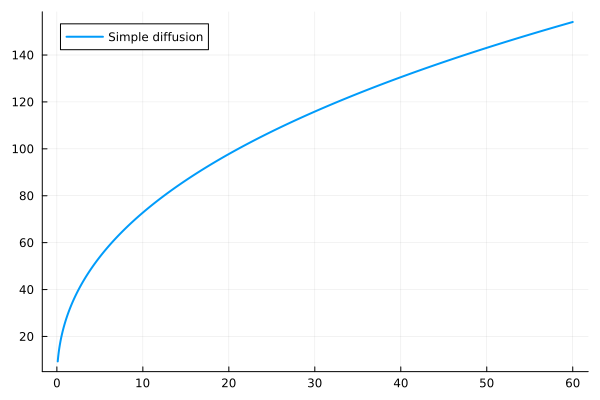

In [153]:
using LinearAlgebra: norm

function wavefront_radius_diff(D, M, t, C_0)
    term1 = log(C_0)
    term2 = log(M / (4π * D * t)^(3/2))
    r_square = -4D * t * (term1 - term2)
    
    return sqrt(r_square)
end

# Given parameters
D = 12.5  # Diffusion coefficient
M = 0.5e8  # Total amount of source at the origin
C_0 = 0.02  # Threshold concentration for the wavefront

# Given time series
ts_diff = collect(0.1:0.02:60)

# Compute wavefront radii for each time in the series
radii = [wavefront_radius_diff(D, M, t, C_0) for t in ts_diff]

plot(ts_diff, radii, label="Simple diffusion", lw=2)

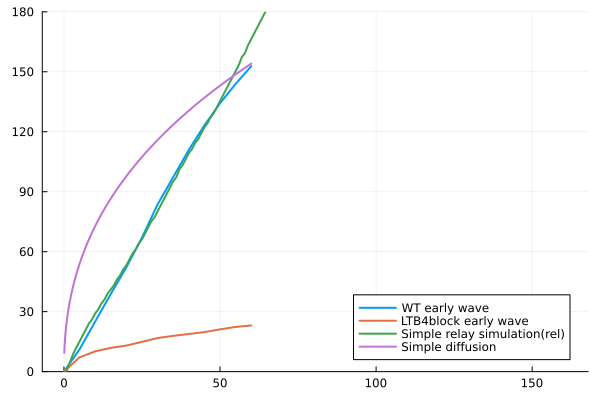

In [154]:
# plot(ts[1:peak_index+2]*t_scale, r_mid[1:peak_index+2]*x_scale .- exp_data[:,:circle_radius][1].- 10,lw = 2, label = "Simulation(rel)")
# plot(exp_data[:,:real_time],exp_data[:,:relative_radius], xlab = "Time (sec)", ylab = "Relative radius(microns)", label="Experimental data(rel)",lw = 2)

WT_early_wave_mean = CSV.read("WT_early_wave_mean_travel.csv", DataFrame)
plot(WT_early_wave_mean[:,:real_time],WT_early_wave_mean[:,:rel_r], label="WT early wave",lw = 2)

LTB4block_early_wave_mean = CSV.read("LTB4block_early_wave_mean_travel.csv", DataFrame)
plot!(LTB4block_early_wave_mean[:,:real_time],LTB4block_early_wave_mean[:,:rel_r], label="LTB4block early wave",lw = 2,legend=:bottomright)

plot!(ts[1:peak_index+2]*t_scale .- 2, r_Lth[1:peak_index+2]*x_scale .- r_source,lw = 2, label = "Simple relay simulation(rel)")

plot!(ylim=(0,180))
plot!(ts_diff, radii, label="Simple diffusion", lw=2)

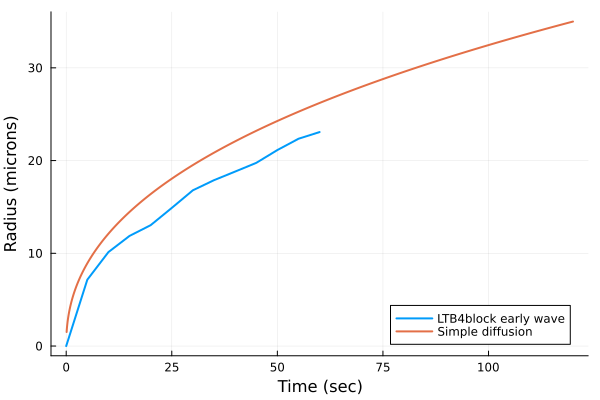

In [179]:
# Given parameters
D = 0.3  # Diffusion coefficient
M = 19.0e7 # Total amount of source at the origin
C_0 = 4  # Threshold concentration for the wavefront

# Given time series
# ts = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]  # Example time series
ts_diff = collect(0.1:0.02:120)

# Compute wavefront radii for each time in the series
radii = [wavefront_radius_diff(D, M, t, C_0) for t in ts_diff]


LTB4block_early_wave_mean = CSV.read("LTB4block_early_wave_mean_travel.csv", DataFrame)
plot(LTB4block_early_wave_mean[:,:real_time],LTB4block_early_wave_mean[:,:rel_r], label="LTB4block early wave",lw = 2,legend=:bottomright)


plot!(ts_diff, radii, label="Simple diffusion", lw=2, xlab="Time (sec)", ylab="Radius (microns)")

In [180]:

CSV.write("fits/BIIL315_simple.csv", DataFrame(time=ts_diff, r_simple = radii.^2))


"fits/BIIL315_simple.csv"